In [18]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense
from sklearn.model_selection import KFold, train_test_split
from keras.optimizers import Adam, SGD
from keras import regularizers

from preprocess import normalize

window_size_ms = 200.
samples_per_window = 20

In [20]:
X = np.load("processed/spacedout1-2_X.npy")
has_touch_y = np.load("processed/spacedout1-2_has_touch_y.npy")
touch_loc_y = np.load("processed/spacedout1-2_touch_loc_y.npy")
X = X.reshape((-1, 120))
X = X[has_touch_y == 1]
touch_loc_y = touch_loc_y[has_touch_y == 1]
touch_loc_y = normalize(touch_loc_y)

Min:  [ 83.14286041 267.42855835]
Range:  [275.99999237 364.85714722]
lol?


In [21]:
print(X.shape)
print(touch_loc_y.shape)
print(np.ptp(X))
print(np.min(touch_loc_y))

(621, 120)
(621, 2)
1.0
0.0


In [22]:
def build_model():
    model = Sequential()
    model.add(Dense(128, activation="relu", input_dim=(samples_per_window * 6)))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))#, kernel_regularizer=regularizers.l2(0.003)))
    model.add(Dense(2, activation="linear", kernel_initializer="normal"))
    model.compile(loss="mean_squared_error", optimizer=SGD(lr=0.01, momentum=0.9), metrics = ["mse"])
    return model

In [25]:
model = build_model()
history = model.fit(np.random.rand(*X.shape), np.random.rand(*touch_loc_y.shape), epochs=100)

Epoch 1/200
621/621 [==============================] - 0s - loss: 0.1512 - mean_squared_error: 0.1512     
Epoch 2/200
621/621 [==============================] - 0s - loss: 0.0900 - mean_squared_error: 0.0900     
Epoch 3/200
621/621 [==============================] - 0s - loss: 0.0857 - mean_squared_error: 0.0857     
Epoch 4/200
621/621 [==============================] - 0s - loss: 0.0842 - mean_squared_error: 0.0842     
Epoch 5/200
621/621 [==============================] - 0s - loss: 0.0827 - mean_squared_error: 0.0827     
Epoch 6/200
621/621 [==============================] - 0s - loss: 0.0822 - mean_squared_error: 0.0822     
Epoch 7/200
621/621 [==============================] - 0s - loss: 0.0821 - mean_squared_error: 0.0821     
Epoch 8/200
621/621 [==============================] - 0s - loss: 0.0818 - mean_squared_error: 0.0818     
Epoch 9/200
621/621 [==============================] - 0s - loss: 0.0815 - mean_squared_error: 0.0815     
Epoch 10/200
621/621 [===============

621/621 [==============================] - 0s - loss: 0.0101 - mean_squared_error: 0.0101     
Epoch 77/200
621/621 [==============================] - 0s - loss: 0.0098 - mean_squared_error: 0.0098     
Epoch 78/200
621/621 [==============================] - 0s - loss: 0.0093 - mean_squared_error: 0.0093     
Epoch 79/200
621/621 [==============================] - 0s - loss: 0.0083 - mean_squared_error: 0.0083     
Epoch 80/200
621/621 [==============================] - 0s - loss: 0.0071 - mean_squared_error: 0.0071     
Epoch 81/200
621/621 [==============================] - 0s - loss: 0.0068 - mean_squared_error: 0.0068     
Epoch 82/200
621/621 [==============================] - 0s - loss: 0.0073 - mean_squared_error: 0.0073     
Epoch 83/200
621/621 [==============================] - 0s - loss: 0.0063 - mean_squared_error: 0.0063     
Epoch 84/200
621/621 [==============================] - 0s - loss: 0.0055 - mean_squared_error: 0.0055     
Epoch 85/200
621/621 [===================

621/621 [==============================] - 0s - loss: 6.1034e-05 - mean_squared_error: 6.1034e-05     
Epoch 149/200
621/621 [==============================] - 0s - loss: 5.4206e-05 - mean_squared_error: 5.4206e-05     
Epoch 150/200
621/621 [==============================] - 0s - loss: 4.9856e-05 - mean_squared_error: 4.9856e-05     
Epoch 151/200
621/621 [==============================] - 0s - loss: 4.5871e-05 - mean_squared_error: 4.5871e-05     
Epoch 152/200
621/621 [==============================] - 0s - loss: 4.1418e-05 - mean_squared_error: 4.1418e-05     
Epoch 153/200
621/621 [==============================] - 0s - loss: 3.9012e-05 - mean_squared_error: 3.9012e-05     
Epoch 154/200
621/621 [==============================] - 0s - loss: 3.9646e-05 - mean_squared_error: 3.9646e-05     
Epoch 155/200
621/621 [==============================] - 0s - loss: 3.5185e-05 - mean_squared_error: 3.5185e-05     
Epoch 156/200
621/621 [==============================] - 0s - loss: 3.6826e-05

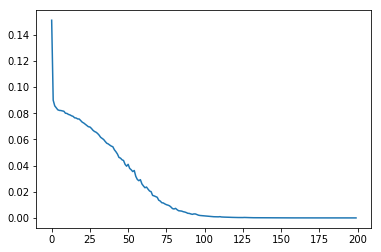

In [26]:
plt.plot(history.history["loss"])

In [27]:
kf = KFold(n_splits = 5, shuffle=True)
seed = 0

mses = []
histories = []

for train_idx, test_idx in kf.split(X, touch_loc_y):
    x_train, x_test = X[train_idx], X[test_idx]
    y_train, y_test = touch_loc_y[train_idx], touch_loc_y[test_idx]
    
    model = build_model()

    history = model.fit(x_train, y_train, epochs=200, batch_size=20, validation_data=(x_test, y_test))
    _, mse = model.evaluate(x_test, y_test)
    print("MSE: ", mse)
    mses.append(mse)
    histories.append(history)

Train on 496 samples, validate on 125 samples
Epoch 1/200
496/496 [==============================] - 0s - loss: 0.1001 - mean_squared_error: 0.1001 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 2/200
496/496 [==============================] - 0s - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.0390 - val_mean_squared_error: 0.0390
Epoch 3/200
496/496 [==============================] - 0s - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 4/200
496/496 [==============================] - 0s - loss: 0.0402 - mean_squared_error: 0.0402 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 5/200
496/496 [==============================] - 0s - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 6/200
496/496 [==============================] - 0s - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.0321 - val_mean_squared_error: 0.0321
Epoch 7/200
496/496 [=========

496/496 [==============================] - 0s - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 54/200
496/496 [==============================] - 0s - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 55/200
496/496 [==============================] - 0s - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 56/200
496/496 [==============================] - 0s - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 57/200
496/496 [==============================] - 0s - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 58/200
496/496 [==============================] - 0s - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 59/200
496/496 [==============================] - 0s - loss: 0.0261 - mean_sq

496/496 [==============================] - 0s - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 106/200
496/496 [==============================] - 0s - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 107/200
496/496 [==============================] - 0s - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0321 - val_mean_squared_error: 0.0321
Epoch 108/200
496/496 [==============================] - 0s - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 109/200
496/496 [==============================] - 0s - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 110/200
496/496 [==============================] - 0s - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 111/200
496/496 [==============================] - 0s - loss: 0.0248 - m

496/496 [==============================] - 0s - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 158/200
496/496 [==============================] - 0s - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 159/200
496/496 [==============================] - 0s - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 160/200
496/496 [==============================] - 0s - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 161/200
496/496 [==============================] - 0s - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 162/200
496/496 [==============================] - 0s - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 163/200
496/496 [==============================] - 0s - loss: 0.0183 - m

497/497 [==============================] - 0s - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 9/200
497/497 [==============================] - 0s - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0320 - val_mean_squared_error: 0.0320
Epoch 10/200
497/497 [==============================] - 0s - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 11/200
497/497 [==============================] - 0s - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 12/200
497/497 [==============================] - 0s - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.0320 - val_mean_squared_error: 0.0320
Epoch 13/200
497/497 [==============================] - 0s - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 14/200
497/497 [==============================] - 0s - loss: 0.0311 - mean_squ

497/497 [==============================] - 0s - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 61/200
497/497 [==============================] - 0s - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 62/200
497/497 [==============================] - 0s - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 63/200
497/497 [==============================] - 0s - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 64/200
497/497 [==============================] - 0s - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 65/200
497/497 [==============================] - 0s - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 66/200
497/497 [==============================] - 0s - loss: 0.0251 - mean_sq

497/497 [==============================] - 0s - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 113/200
497/497 [==============================] - 0s - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0253 - val_mean_squared_error: 0.0253
Epoch 114/200
497/497 [==============================] - 0s - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 115/200
497/497 [==============================] - 0s - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 116/200
497/497 [==============================] - 0s - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 117/200
497/497 [==============================] - 0s - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 118/200
497/497 [==============================] - 0s - loss: 0.0225 - m

497/497 [==============================] - 0s - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 165/200
497/497 [==============================] - 0s - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0245 - val_mean_squared_error: 0.0245
Epoch 166/200
497/497 [==============================] - 0s - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 167/200
497/497 [==============================] - 0s - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 168/200
497/497 [==============================] - 0s - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 169/200
497/497 [==============================] - 0s - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 170/200
497/497 [==============================] - 0s - loss: 0.0193 - m

497/497 [==============================] - 0s - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 16/200
497/497 [==============================] - 0s - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 17/200
497/497 [==============================] - 0s - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 18/200
497/497 [==============================] - 0s - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 19/200
497/497 [==============================] - 0s - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 20/200
497/497 [==============================] - 0s - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 21/200
497/497 [==============================] - 0s - loss: 0.0305 - mean_sq

497/497 [==============================] - 0s - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 68/200
497/497 [==============================] - 0s - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 69/200
497/497 [==============================] - 0s - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 70/200
497/497 [==============================] - 0s - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0387 - val_mean_squared_error: 0.0387
Epoch 71/200
497/497 [==============================] - 0s - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 72/200
497/497 [==============================] - 0s - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0273 - val_mean_squared_error: 0.0273
Epoch 73/200
497/497 [==============================] - 0s - loss: 0.0242 - mean_sq

497/497 [==============================] - 0s - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 120/200
497/497 [==============================] - 0s - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 121/200
497/497 [==============================] - 0s - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 122/200
497/497 [==============================] - 0s - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 123/200
497/497 [==============================] - 0s - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 124/200
497/497 [==============================] - 0s - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 125/200
497/497 [==============================] - 0s - loss: 0.0207 - m

497/497 [==============================] - 0s - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 172/200
497/497 [==============================] - 0s - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0252 - val_mean_squared_error: 0.0252
Epoch 173/200
497/497 [==============================] - 0s - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 174/200
497/497 [==============================] - 0s - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 175/200
497/497 [==============================] - 0s - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 176/200
497/497 [==============================] - 0s - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 177/200
497/497 [==============================] - 0s - loss: 0.0172 - m

497/497 [==============================] - 0s - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 24/200
497/497 [==============================] - 0s - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 25/200
497/497 [==============================] - 0s - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 26/200
497/497 [==============================] - 0s - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 27/200
497/497 [==============================] - 0s - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 28/200
497/497 [==============================] - 0s - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 29/200
497/497 [==============================] - 0s - loss: 0.0290 - mean_sq

497/497 [==============================] - 0s - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 76/200
497/497 [==============================] - 0s - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 77/200
497/497 [==============================] - 0s - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 78/200
497/497 [==============================] - 0s - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 79/200
497/497 [==============================] - 0s - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 80/200
497/497 [==============================] - 0s - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 81/200
497/497 [==============================] - 0s - loss: 0.0241 - mean_sq

497/497 [==============================] - 0s - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 128/200
497/497 [==============================] - 0s - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 129/200
497/497 [==============================] - 0s - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 130/200
497/497 [==============================] - 0s - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 131/200
497/497 [==============================] - 0s - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 132/200
497/497 [==============================] - 0s - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 133/200
497/497 [==============================] - 0s - loss: 0.0221 - m

497/497 [==============================] - 0s - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 180/200
497/497 [==============================] - 0s - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 181/200
497/497 [==============================] - 0s - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 182/200
497/497 [==============================] - 0s - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 183/200
497/497 [==============================] - 0s - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 184/200
497/497 [==============================] - 0s - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 185/200
497/497 [==============================] - 0s - loss: 0.0205 - m

497/497 [==============================] - 0s - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0321 - val_mean_squared_error: 0.0321
Epoch 32/200
497/497 [==============================] - 0s - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 33/200
497/497 [==============================] - 0s - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0319 - val_mean_squared_error: 0.0319
Epoch 34/200
497/497 [==============================] - 0s - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 35/200
497/497 [==============================] - 0s - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 36/200
497/497 [==============================] - 0s - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0308 - val_mean_squared_error: 0.0308
Epoch 37/200
497/497 [==============================] - 0s - loss: 0.0276 - mean_sq

497/497 [==============================] - 0s - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 84/200
497/497 [==============================] - 0s - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 85/200
497/497 [==============================] - 0s - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 86/200
497/497 [==============================] - 0s - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0321 - val_mean_squared_error: 0.0321
Epoch 87/200
497/497 [==============================] - 0s - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 88/200
497/497 [==============================] - 0s - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 89/200
497/497 [==============================] - 0s - loss: 0.0245 - mean_sq

497/497 [==============================] - 0s - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 136/200
497/497 [==============================] - 0s - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 137/200
497/497 [==============================] - 0s - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 138/200
497/497 [==============================] - 0s - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 139/200
497/497 [==============================] - 0s - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 140/200
497/497 [==============================] - 0s - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 141/200
497/497 [==============================] - 0s - loss: 0.0210 - m

497/497 [==============================] - 0s - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 188/200
497/497 [==============================] - 0s - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 189/200
497/497 [==============================] - 0s - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 190/200
497/497 [==============================] - 0s - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 191/200
497/497 [==============================] - 0s - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 192/200
497/497 [==============================] - 0s - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 193/200
497/497 [==============================] - 0s - loss: 0.0213 - m

In [31]:
print(mses)
print(np.mean(mses))

[0.02677894778549671, 0.023824987332186392, 0.02535180627338348, 0.026364390467924458, 0.02326449751853943]
0.025116925875506096


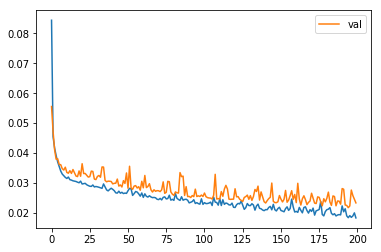

In [32]:
plt.plot(histories[4].history["loss"])
plt.plot(histories[4].history["val_loss"], label="val")
plt.legend()

/Users/jessy/.virtualenvs/cocosci/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


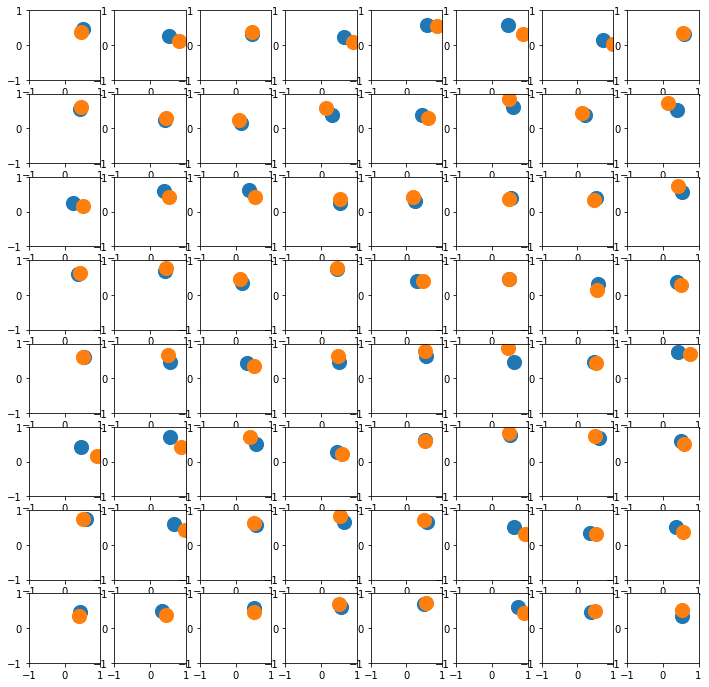

In [33]:
nrows = 8
ncols = 8

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
axes = axes.reshape(-1)

for i in range(nrows * ncols):
    axes[i].scatter(*model.predict(x_test)[i], s=200)
    axes[i].scatter(*y_test[i], s=200)
    
    axes[i].set_xlim(-1, 1)
    axes[i].set_ylim(-1, 1)

fig.show()

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, touch_loc_y, test_size=0.1)
model = build_model()
history = model.fit(x_train, y_train, epochs=200, batch_size=20, validation_data=(x_test, y_test))

Train on 558 samples, validate on 63 samples
Epoch 1/200
558/558 [==============================] - 0s - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.0536 - val_mean_squared_error: 0.0536
Epoch 2/200
558/558 [==============================] - 0s - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.0532 - val_mean_squared_error: 0.0532
Epoch 3/200
558/558 [==============================] - 0s - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.0502 - val_mean_squared_error: 0.0502
Epoch 4/200
558/558 [==============================] - 0s - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 5/200
558/558 [==============================] - 0s - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0469 - val_mean_squared_error: 0.0469
Epoch 6/200
558/558 [==============================] - 0s - loss: 0.0346 - mean_squared_error: 0.0346 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 7/200
558/558 [==========

558/558 [==============================] - 0s - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 54/200
558/558 [==============================] - 0s - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 55/200
558/558 [==============================] - 0s - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 56/200
558/558 [==============================] - 0s - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 57/200
558/558 [==============================] - 0s - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 58/200
558/558 [==============================] - 0s - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 59/200
558/558 [==============================] - 0s - loss: 0.0254 - mean_sq

558/558 [==============================] - 0s - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 106/200
558/558 [==============================] - 0s - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch 107/200
558/558 [==============================] - 0s - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 108/200
558/558 [==============================] - 0s - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch 109/200
558/558 [==============================] - 0s - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 110/200
558/558 [==============================] - 0s - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 111/200
558/558 [==============================] - 0s - loss: 0.0213 - m

558/558 [==============================] - 0s - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 158/200
558/558 [==============================] - 0s - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 159/200
558/558 [==============================] - 0s - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 160/200
558/558 [==============================] - 0s - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 161/200
558/558 [==============================] - 0s - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 162/200
558/558 [==============================] - 0s - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 163/200
558/558 [==============================] - 0s - loss: 0.0203 - m

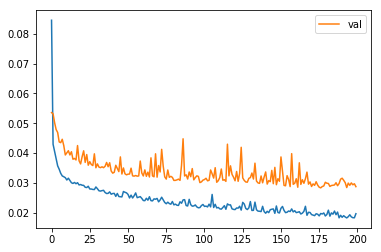

In [35]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"], label="val")
plt.legend()

In [36]:
model.save("touch_loc_model.h5")